SUPERVISED LEARNING

In [1]:
# import the libraries
import pandas as pd

# Cleaning the data
# read data in pandas dataframe
data = pd.read_csv("weather.csv")

# drop (delete) the unnecessary columns in the data
data = data.drop(
    ['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis=1)

data = data.replace('T', 0.0)
data = data.replace('-', 0.0)

# Save the data in a csv file
data.to_csv('weather_final.csv')

The precipitation in inches for the input is: [[1.33868402]]
The precipitation trend graph: 


C:\Users\srees\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


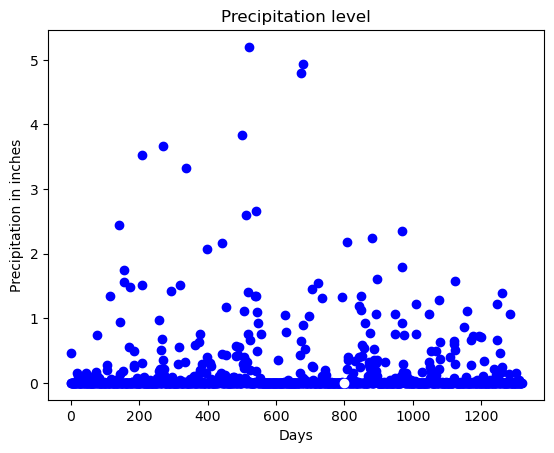

Preciptiation Vs Selected Attributes Graph: 


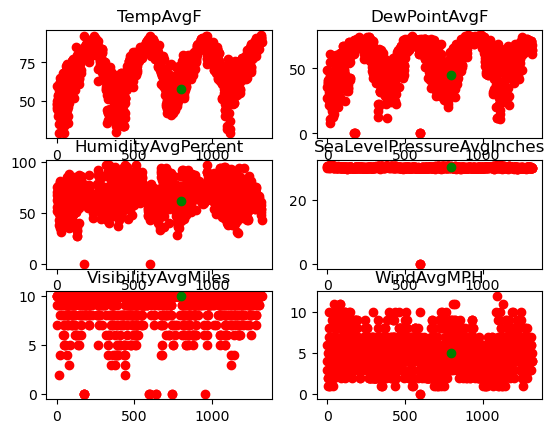

In [3]:
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# read the cleaned data
data = pd.read_csv("weather_final.csv")

X = data.drop(['PrecipitationSumInches'], axis=1)

Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)

day_index = 798
days = [i for i in range(Y.size)]

clf = LinearRegression()
clf.fit(X, Y)

inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

inp = inp.reshape(1, -1)

# Print output
print('The precipitation in inches for the input is:', clf.predict(inp))

print('The precipitation trend graph: ')
plt.scatter(days, Y, color='b')
plt.scatter(days[day_index], Y[day_index], color='w')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

# Plot a graph of precipitation levels vs n# of days
plt.show()


x_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                'WindAvgMPH'], axis=1)
print('Preciptiation Vs Selected Attributes Graph: ')
for i in range(x_f.columns.size):
    plt.subplot(3, 2, i+1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='r')
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]]
                [day_index], color='g')
    plt.title(x_f.columns.values[i])

# plot a graph with a few features vs precipitation to observe the trends
plt.show()